In [29]:
import random
import numpy as np

eps-greedy

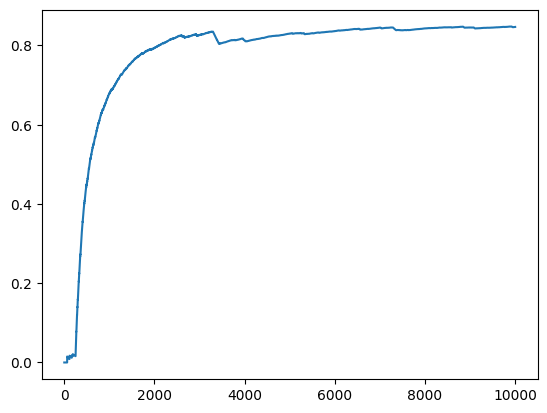

In [30]:
class ThugPerformace:
    def __init__(self, initial_Q=0):
        self.Q = initial_Q

    def update(self, reward):
        self.Q += 0.1 * (reward - self.Q)


n = 10000
thug_count = 10
performances = [ThugPerformace() for _ in range(thug_count)]
eps = 0.1

first_thug = random.randint(0, thug_count - 1)
optimal_actions = [1] if first_thug == 0 else [0]


def calculate_reward(thug_index):
    if thug_index == 0:
        return random.expovariate(1)

    return random.expovariate(2)


for i in range(n):
    if random.random() < eps:
        # explore
        thug = random.randint(0, thug_count - 1)
    else:
        # exploit
        qs = [p.Q for p in performances]
        argmaxes = np.argwhere(qs == np.max(qs)).flatten()
        thug = random.choice(argmaxes)

    reward = calculate_reward(thug)
    performances[thug].update(reward)

    optimal_actions.append(
        optimal_actions[-1] + 1 if thug == 0 else optimal_actions[-1]
    )

import matplotlib.pyplot as plt

plt.plot(
    [i for i in range(len(optimal_actions))],
    [optimal_actions[i - 1] / i for i in range(1, len(optimal_actions) + 1)],
)

greedy

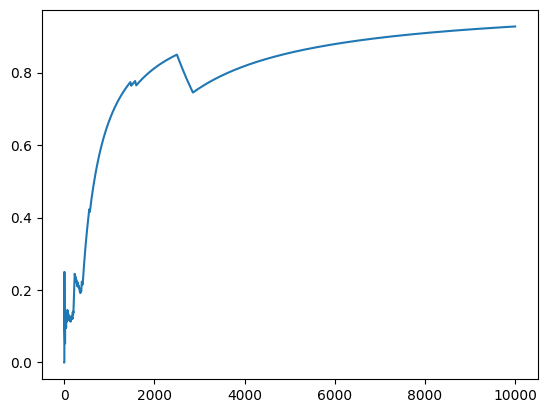

In [31]:
performances = [ThugPerformace(initial_Q=5) for _ in range(thug_count)]

first_thug = random.randint(0, thug_count - 1)
greedy_optimal_actions = [1] if first_thug == 0 else [0]

for i in range(n):
    qs = [p.Q for p in performances]
    argmaxes = np.argwhere(qs == np.max(qs)).flatten()
    thug = random.choice(argmaxes)

    reward = calculate_reward(thug)
    performances[thug].update(reward)

    greedy_optimal_actions.append(
        greedy_optimal_actions[-1] + 1 if thug == 0 else greedy_optimal_actions[-1]
    )

import matplotlib.pyplot as plt

plt.plot(
    [i for i in range(len(greedy_optimal_actions))],
    [
        greedy_optimal_actions[i - 1] / i
        for i in range(1, len(greedy_optimal_actions) + 1)
    ],
)

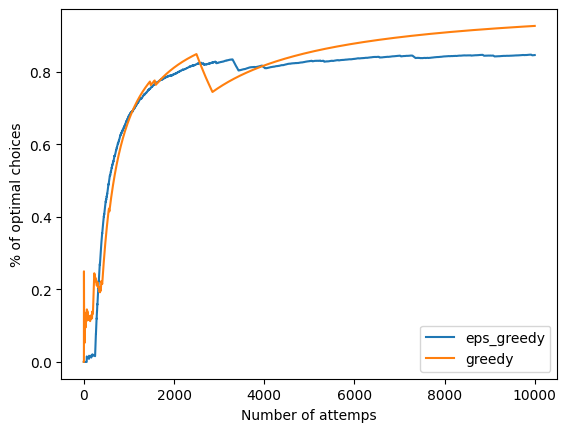

In [32]:
plt.plot(
    [i for i in range(len(optimal_actions))],
    [optimal_actions[i - 1] / i for i in range(1, len(optimal_actions) + 1)],
    label="eps_greedy",
)

plt.plot(
    [i for i in range(len(greedy_optimal_actions))],
    [
        greedy_optimal_actions[i - 1] / i
        for i in range(1, len(greedy_optimal_actions) + 1)
    ],
    label="greedy",
)

plt.xlabel("Number of attemps")
plt.ylabel("% of optimal choices")

plt.legend()